## Extract color feature via a camera

In [ ]:
import cv2
import numpy as np

capt = cv2.VideoCapture(0)

while(1):
    _, frame = capt.read()
    hsv = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)
    
    lower_red = np.array([30,150,50])
    upper_red = np.array([255,255,180])
    
    mask = cv2.inRange(hsv, lower_red, upper_red)
    res = cv2.bitwise_and(frame,frame, mask= mask)

    cv2.imshow('frame',frame)
    cv2.imshow('mask',mask)
    cv2.imshow('res',res)
    
    k = cv2.waitKey(5) & 0xFF
    if k == 27:
        break

cv2.destroyAllWindows()
capt.release()

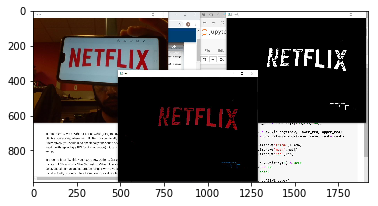

In [3]:
# ploting the results for the notebook

import numpy as np
import matplotlib.pyplot as plt
import cv2
%matplotlib inline

image = cv2.imread('C:/Users/jeanjules.bigeard/OneDrive - Neato Robotics/Documents/results.jpg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

plt.imshow(image)

## Using blur for backgroung 

In [ ]:
import cv2
import numpy as np

capt = cv2.VideoCapture(0)

while(1):

    _, frame = capt.read()
    hsv = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)
    
    lower_red = np.array([30,150,50])
    upper_red = np.array([255,255,180])
    
    mask = cv2.inRange(hsv, lower_red, upper_red)
    res = cv2.bitwise_and(frame,frame, mask= mask)
    
    kernel = np.ones((15,15),np.float32)/225
    smoothed = cv2.filter2D(res,-1,kernel)
    blur = cv2.GaussianBlur(res,(15,15),0)
    median = cv2.medianBlur(res,15)
    bilateral = cv2.bilateralFilter(res,15,75,75)
    
    cv2.imshow('bilateral Blur',bilateral)
    cv2.imshow('Median Blur',median)
    cv2.imshow('Gaussian Blurring',blur)
    cv2.imshow('Original',frame)
    cv2.imshow('Averaging',smoothed)

    k = cv2.waitKey(5) & 0xFF
    if k == 27:
        break

cv2.destroyAllWindows()
capt.release()

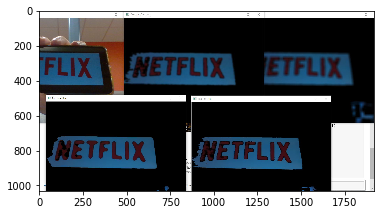

In [6]:
# ploting the results for the notebook

import numpy as np
import matplotlib.pyplot as plt
import cv2
%matplotlib inline

im = cv2.imread('C:/Users/jeanjules.bigeard/OneDrive - Neato Robotics/Documents/blurring.jpg')
im = cv2.cvtColor(im, cv2.COLOR_BGR2RGB)

plt.imshow(im)

## Using morphological transformation

In [ ]:
capt = cv2.VideoCapture(1)

while(1):

    _, frame = capt.read()
    hsv = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)
    
    lower_red = np.array([30,150,50])
    upper_red = np.array([255,255,180])
    
    mask = cv2.inRange(hsv, lower_red, upper_red)
    res = cv2.bitwise_and(frame,frame, mask= mask)

    kernel = np.ones((5,5),np.uint8)
    
    opening = cv2.morphologyEx(mask, cv2.MORPH_OPEN, kernel)
    closing = cv2.morphologyEx(mask, cv2.MORPH_CLOSE, kernel)

    cv2.imshow('Original',frame)
    cv2.imshow('Mask',mask)
    cv2.imshow('Opening',opening)
    cv2.imshow('Closing',closing)

    k = cv2.waitKey(5) & 0xFF
    if k == 27:
        break

cv2.destroyAllWindows()
capt.release()